In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
col_list = ['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'PM2.5 AQI Value']
df = pd.read_csv('data/airquality.csv', usecols=col_list)
df = df.rename({'PM2.5 AQI Value':'AQI'}, axis=1)

In [3]:
#Since climate information is not available for many of them, we have to remove those rows.
df = df.dropna()

In [4]:
df.shape

(2057, 10)

In [5]:
df[df['SLP'].str.contains('-')]

,T,TM,Tm,SLP,H,PP,VV,V,VM,AQI
1617,20.6,21.1,20.0,-,86.0,21.59,10.6,10.4,16.5,25
1802,0.4,1.1,-1.0,-,88.0,20.83,7.9,10.7,20.6,49
1988,24.1,26.7,21.7,-,82.0,0.0,16.1,11.1,16.5,37
2554,10.9,11.1,10.6,-,96.0,3.81,6.6,4.8,13.0,27
3108,24.3,25.0,23.9,-,93.0,0.0,16.1,8.3,14.8,26


In [6]:
df['H'].replace(to_replace='-', value='0', inplace=True)
df['PP'].replace(to_replace='-', value='0', inplace=True)
df['SLP'].replace(to_replace='-', value='0', inplace=True)

df['H'] = df['H'].astype(float)
df['PP'] = df['PP'].astype(float)
df['SLP'] = df['SLP'].astype(float)

## Train Test Split

In [10]:
X = df.loc[:,df.columns!= 'AQI']
y = df['AQI']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Linear Regression

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()
mse=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-200.24552523106505


## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-200.22532271005826


## Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

In [31]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\padma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113127.47346784027, tolerance: 30.500175499565596
  model = cd_fast.enet_coordinate_descent(
C:\Users\padma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113514.04450337088, tolerance: 30.318969417897474
  model = cd_fast.enet_coordinate_descent(
C:\Users\padma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114927.70549241526, tolerance: 30.66311711555169
  model = cd_fast.enet_coordinate_descent(
C:\Users\padma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [32]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-200.24241619797286


## Model Evaluation

In [37]:
y_pred = ridge_regressor.predict(X_test)

<AxesSubplot:>

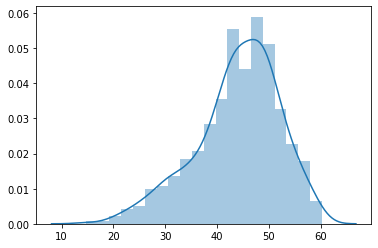

In [38]:
sns.distplot(y_pred)

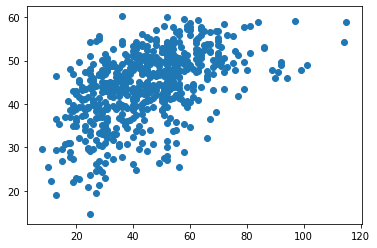

In [39]:
plt.scatter(y_test,y_pred)

In [40]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)

RMSE:  14.439320282052472


### For Deployment

In [42]:
import pickle

In [46]:
file_name = open('ridgeregressor_model.pkl', 'wb')
pickle.dump(ridge_regressor,file_name)